In [1]:
pip install kagglehub seaborn plotly scikit-learn yellowbrick textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emirhanai/social-media-usage-and-emotional-well-being")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Asus\.cache\kagglehub\datasets\emirhanai\social-media-usage-and-emotional-well-being\versions\1


In [339]:
# Selalu awali dengan import-import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from  yellowbrick.cluster  import KElbowVisualizer
from scipy.stats import mode
from sklearn.metrics import silhouette_score, accuracy_score, adjusted_rand_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from textblob import TextBlob
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
%matplotlib inline
warnings.filterwarnings('ignore')

# Cleaning

In [171]:
df = pd.read_csv(f"{path}/train.csv")
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [172]:
# informasi dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,95.950000,3.321000,39.898000,15.611000,22.560000
std,38.850442,1.914582,26.393867,8.819493,8.516274
min,40.000000,1.000000,5.000000,2.000000,8.000000
25%,65.000000,2.000000,20.000000,8.000000,17.750000
50%,85.000000,3.000000,33.000000,14.000000,22.000000
75%,120.000000,4.000000,55.000000,22.000000,28.000000
max,200.000000,8.000000,110.000000,40.000000,50.000000


In [173]:
df.drop(columns=['Dominant_Emotion'], inplace=True)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
dtypes: float64(5), object(4)
memory usage: 70.5+ KB


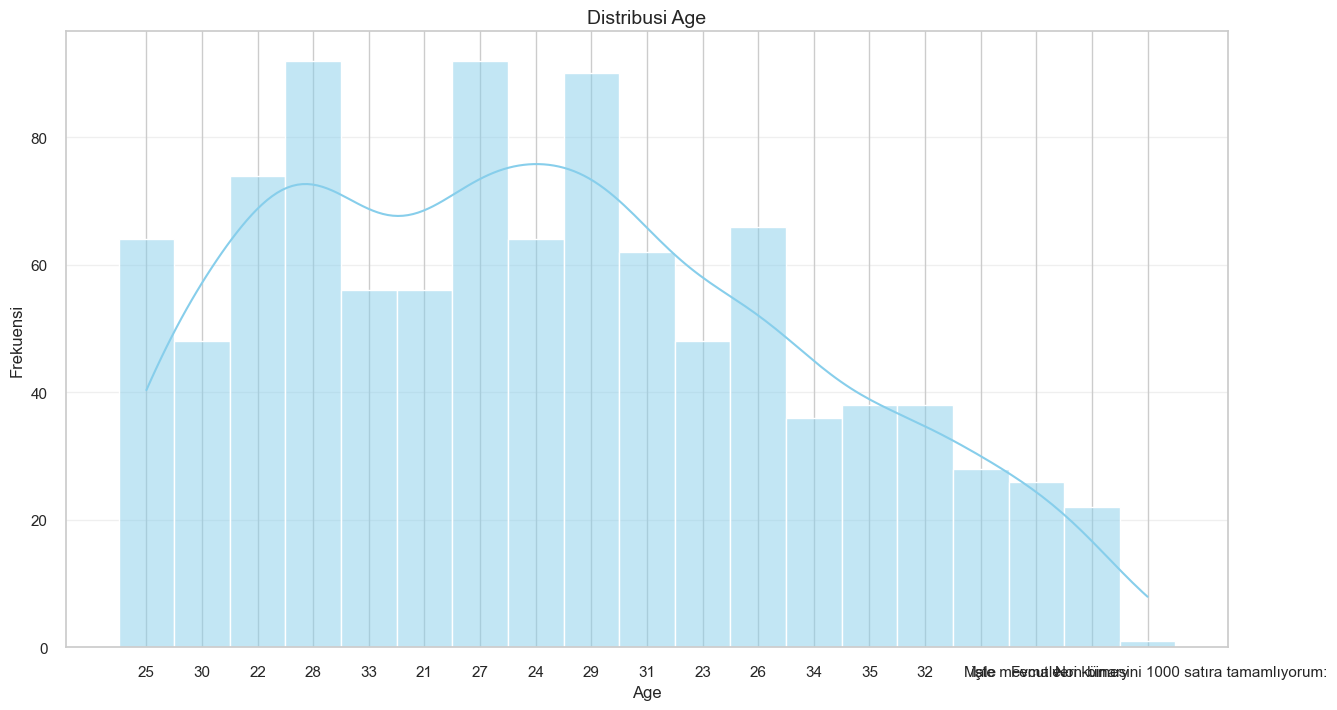

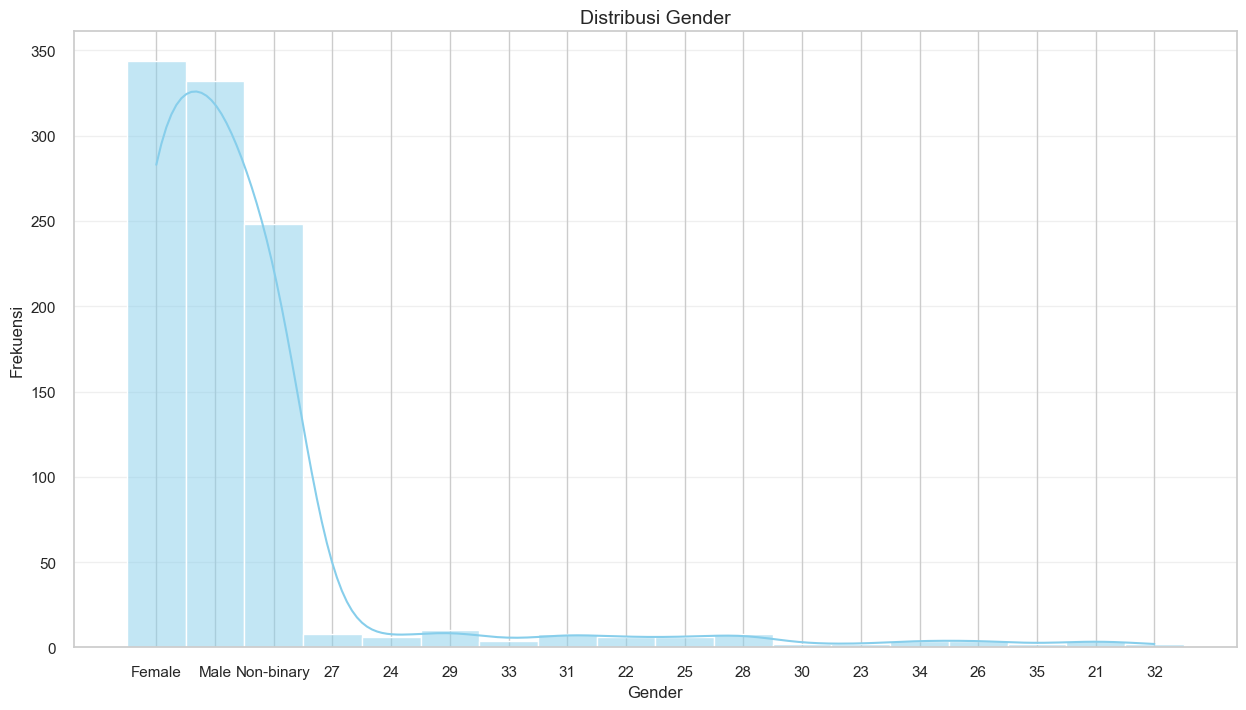

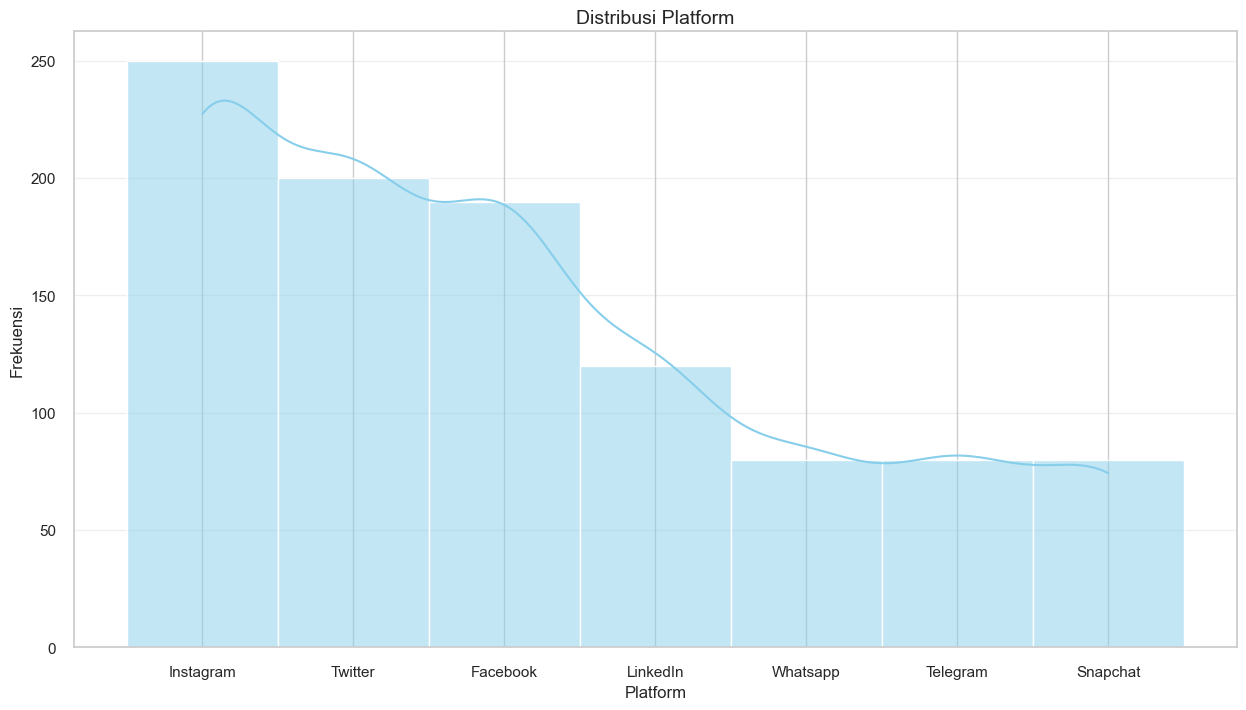

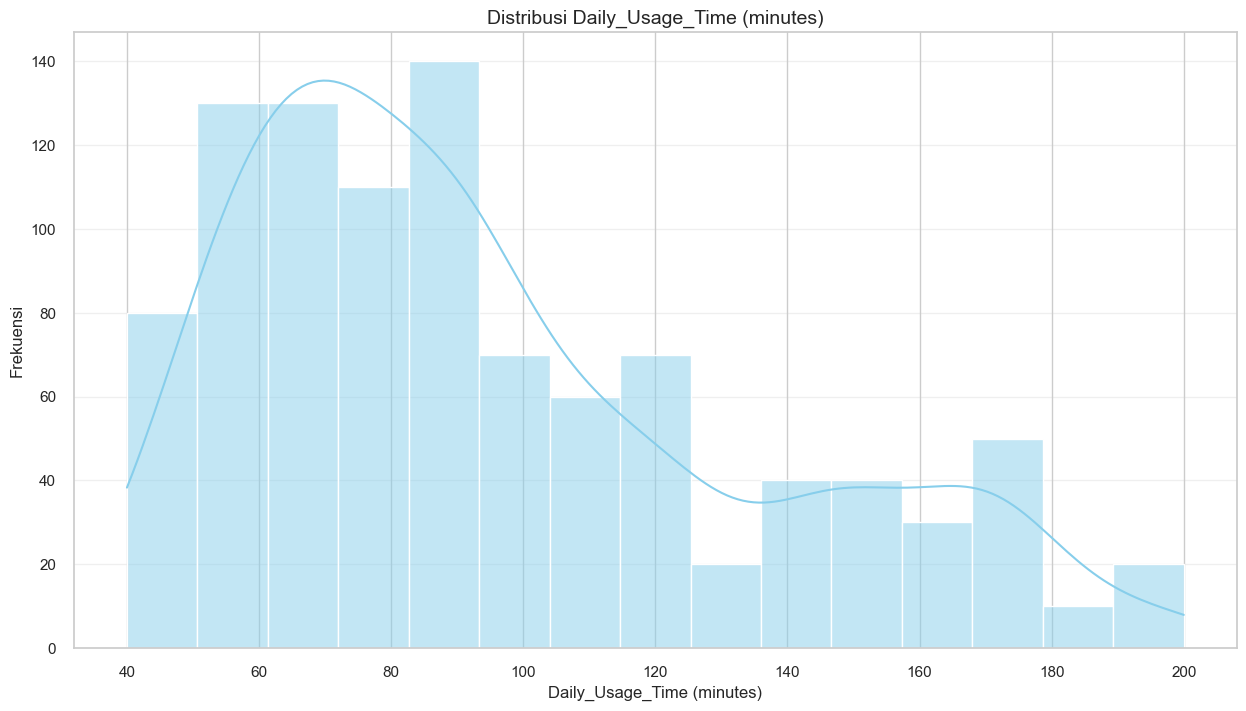

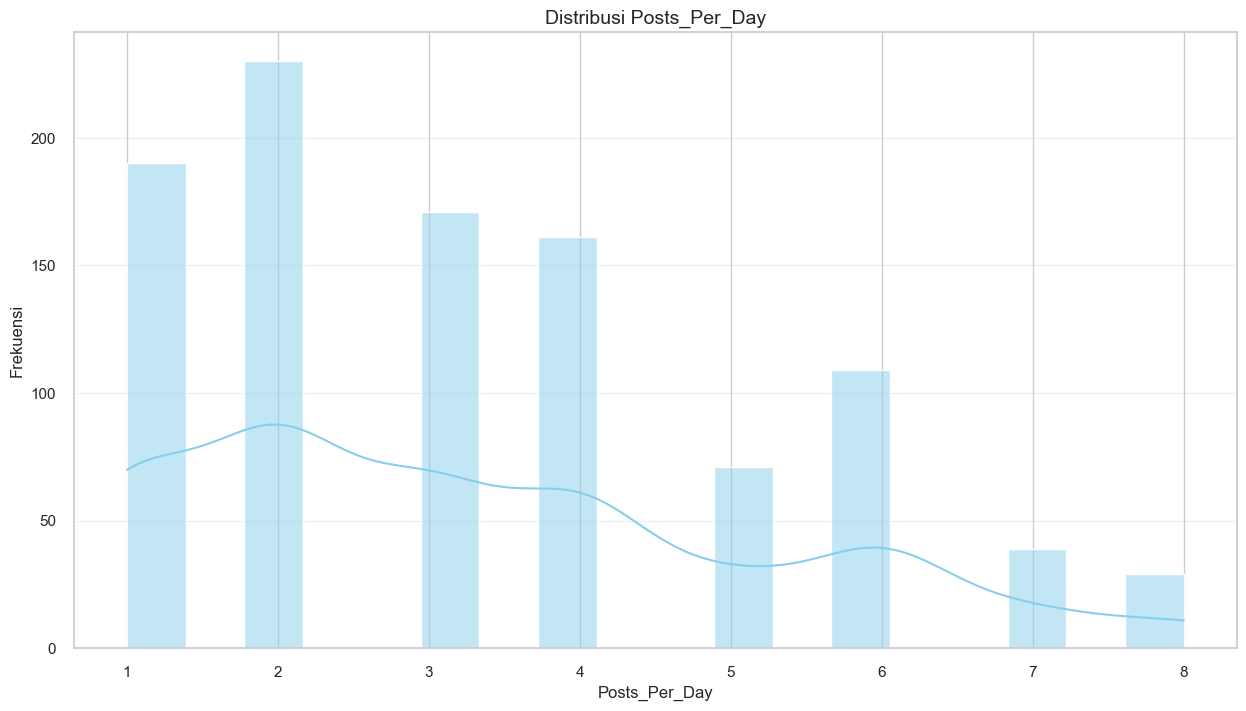

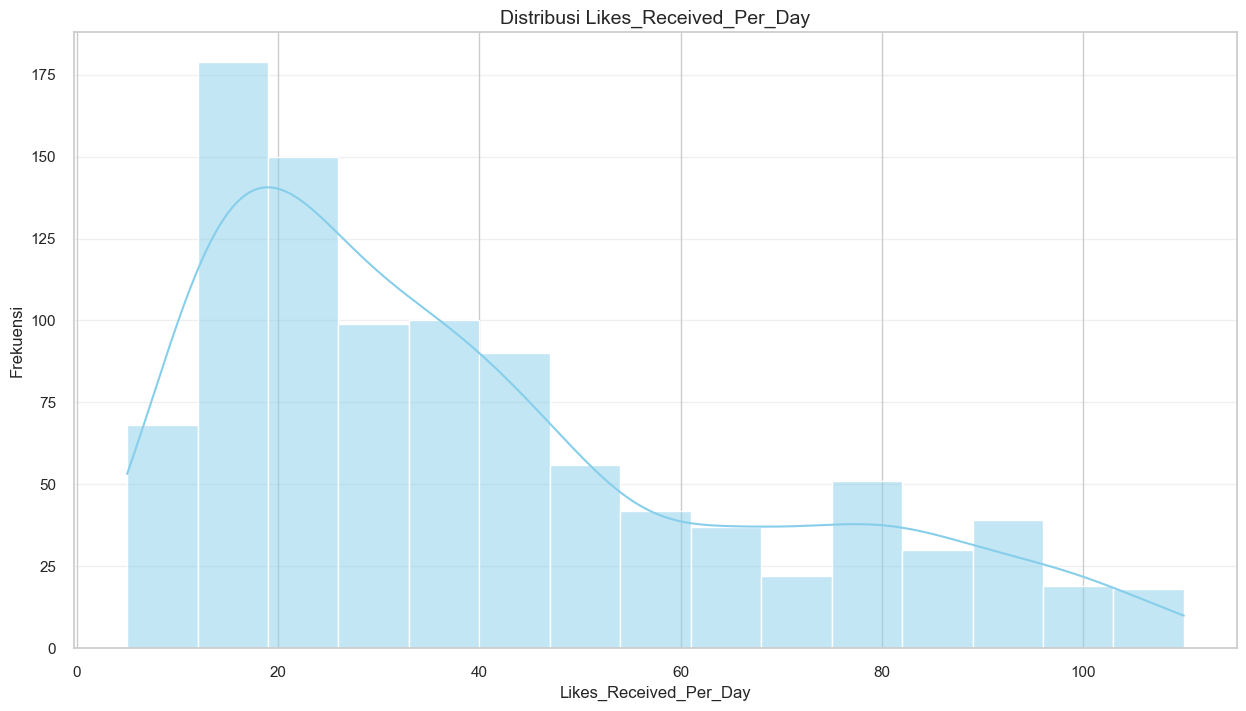

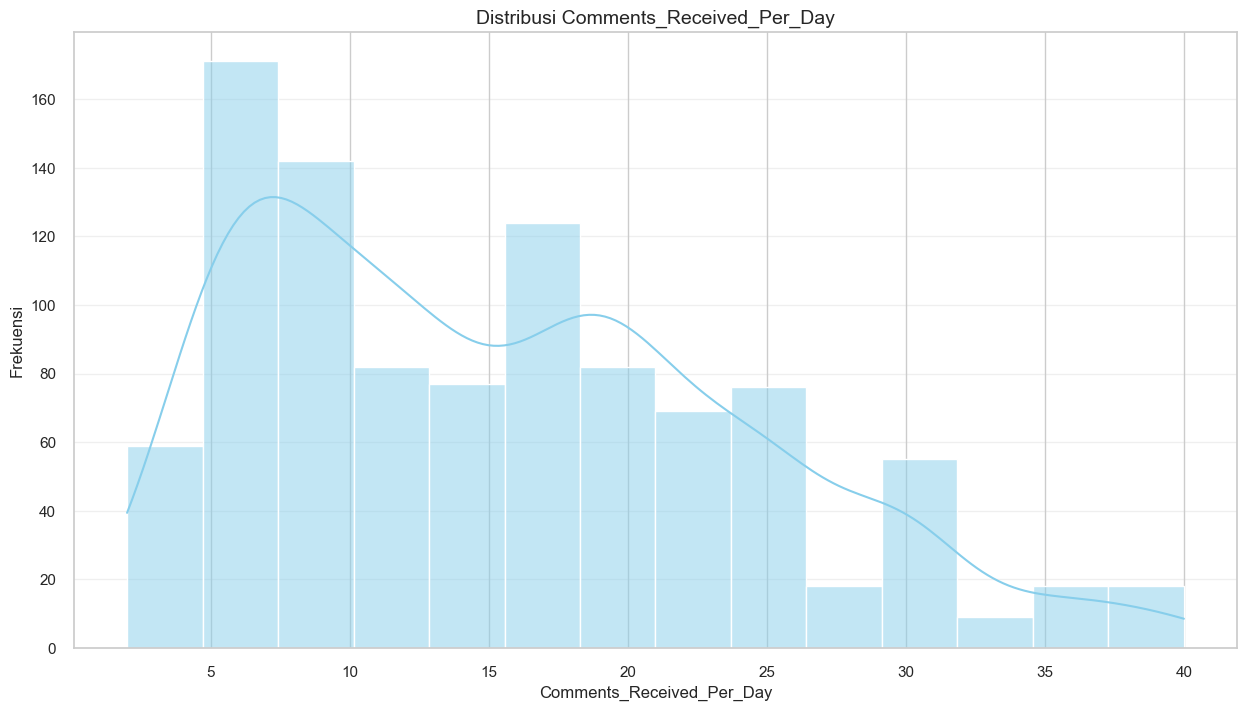

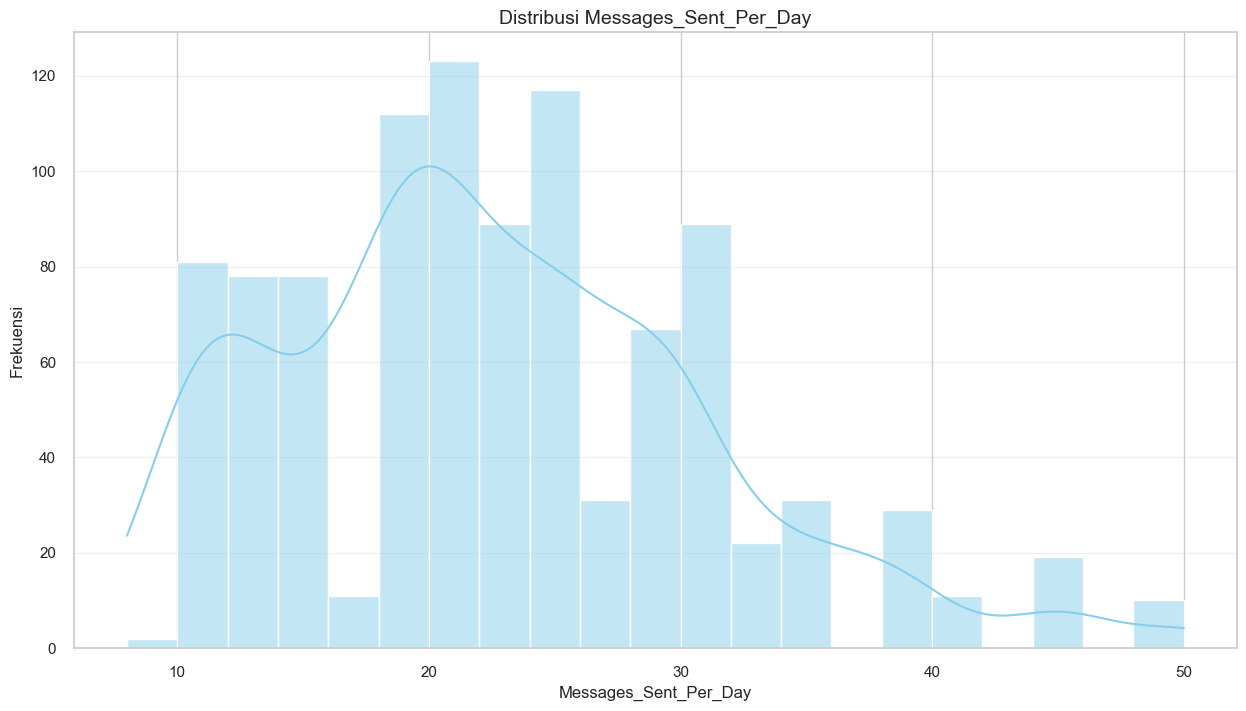

In [175]:
for col in df.columns[1:]:
    plt.figure(figsize=(15, 8))
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(f'Distribusi {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(axis='y', alpha=0.3)
    plt.show()

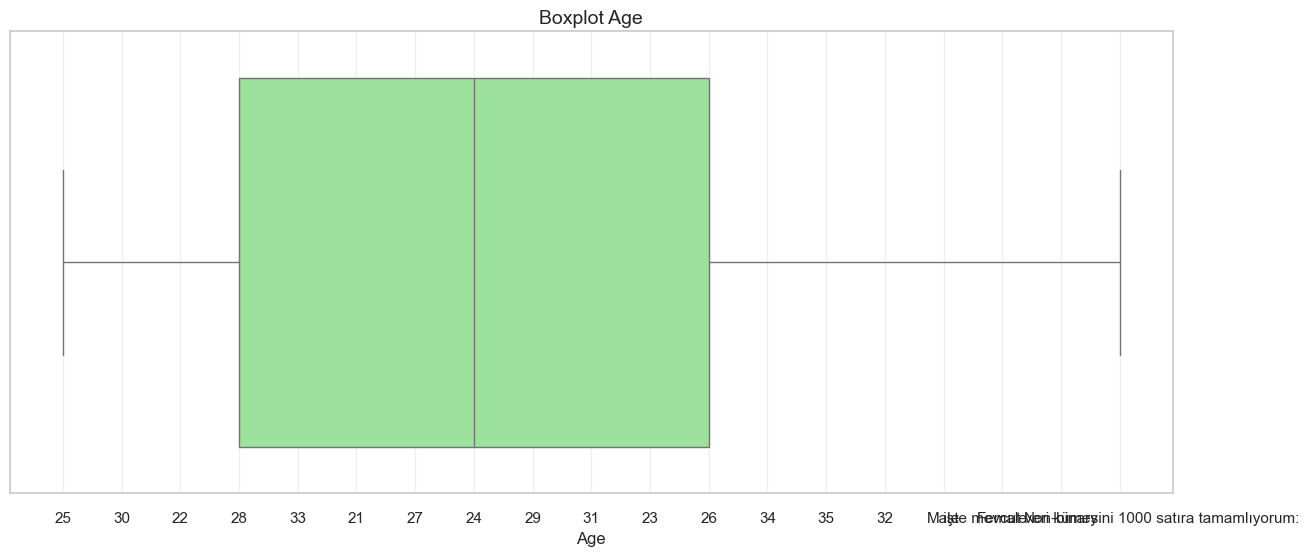

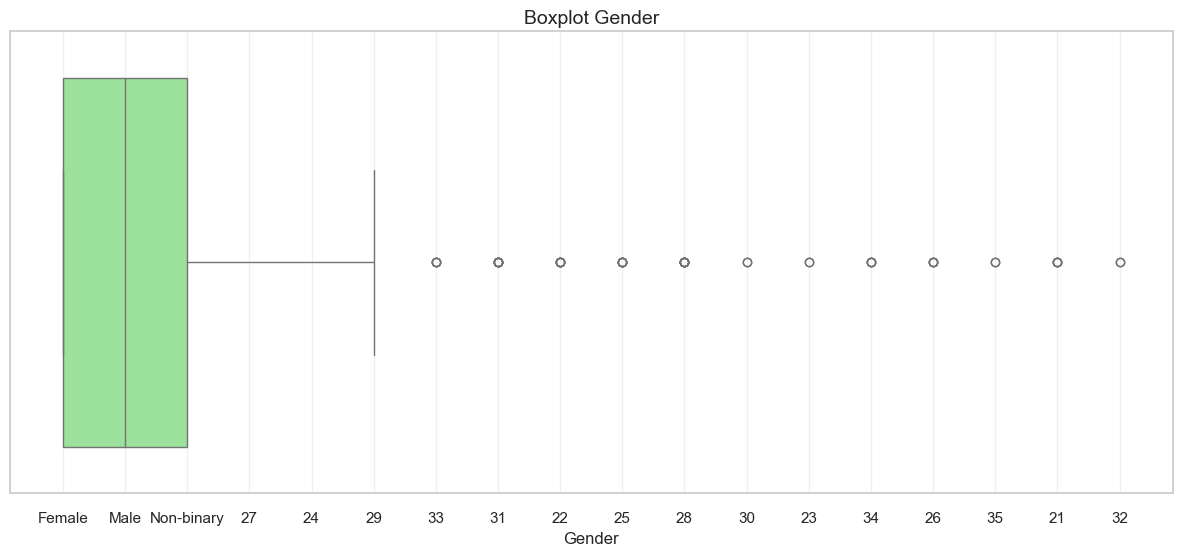

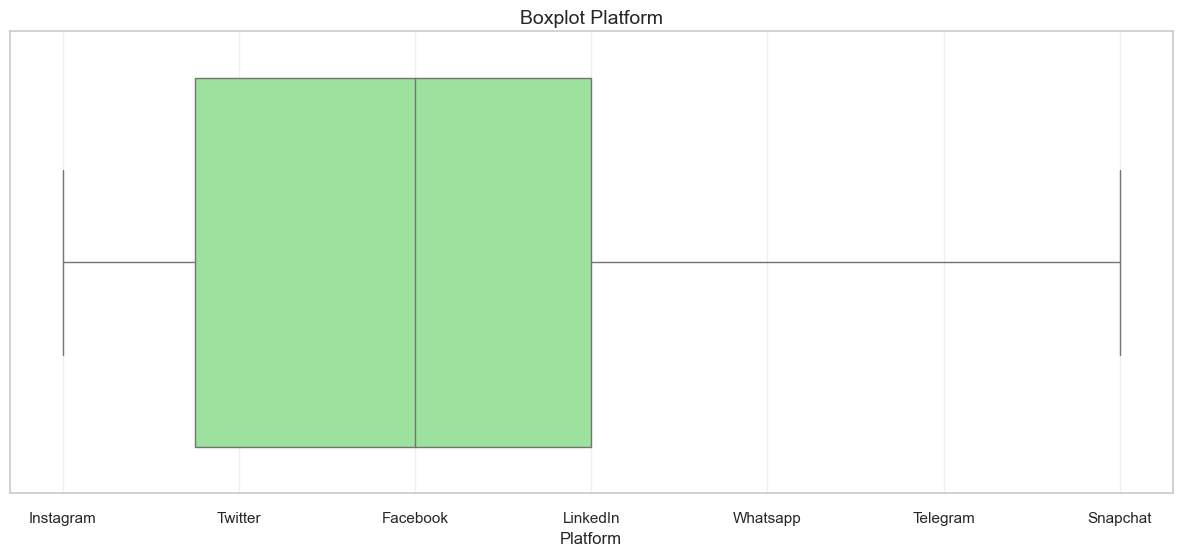

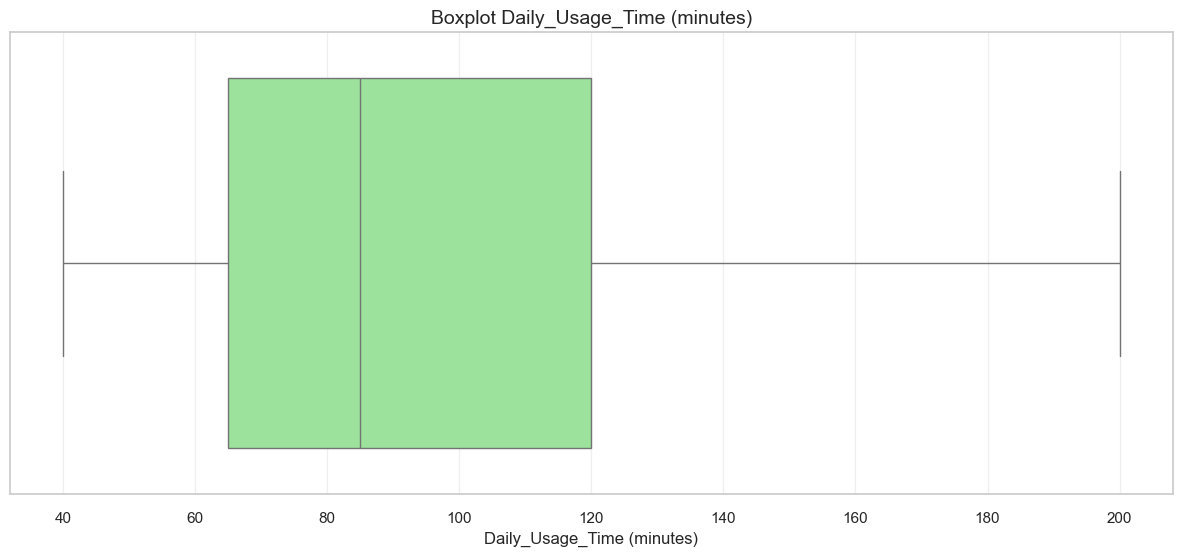

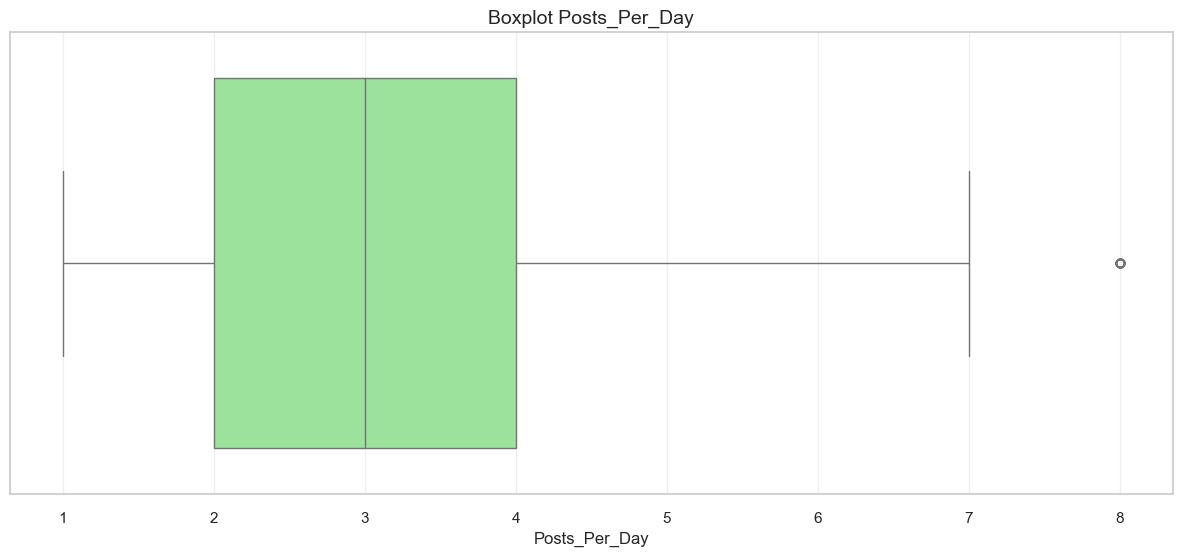

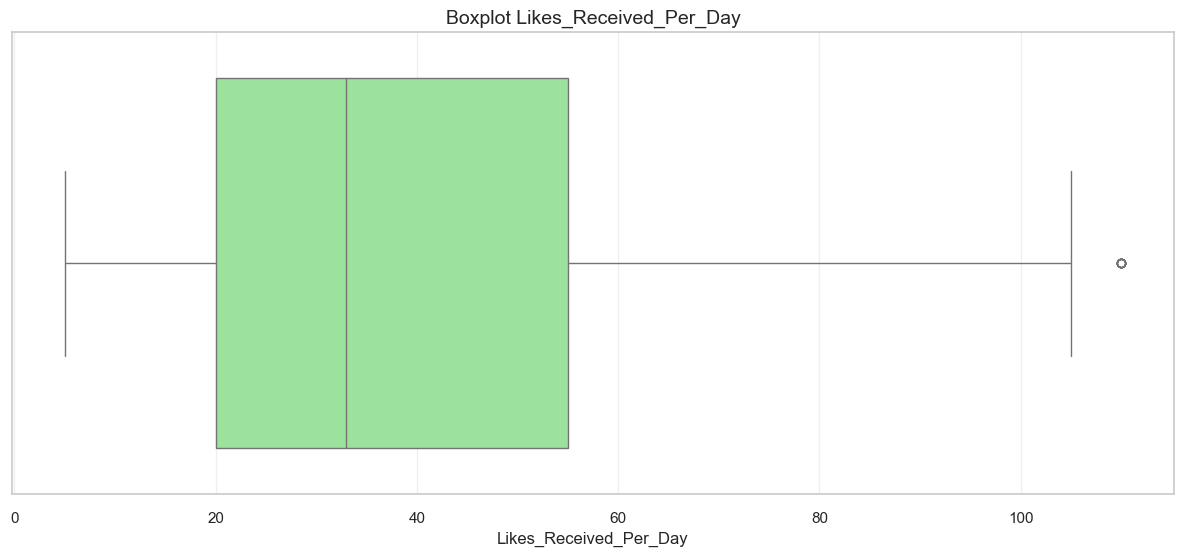

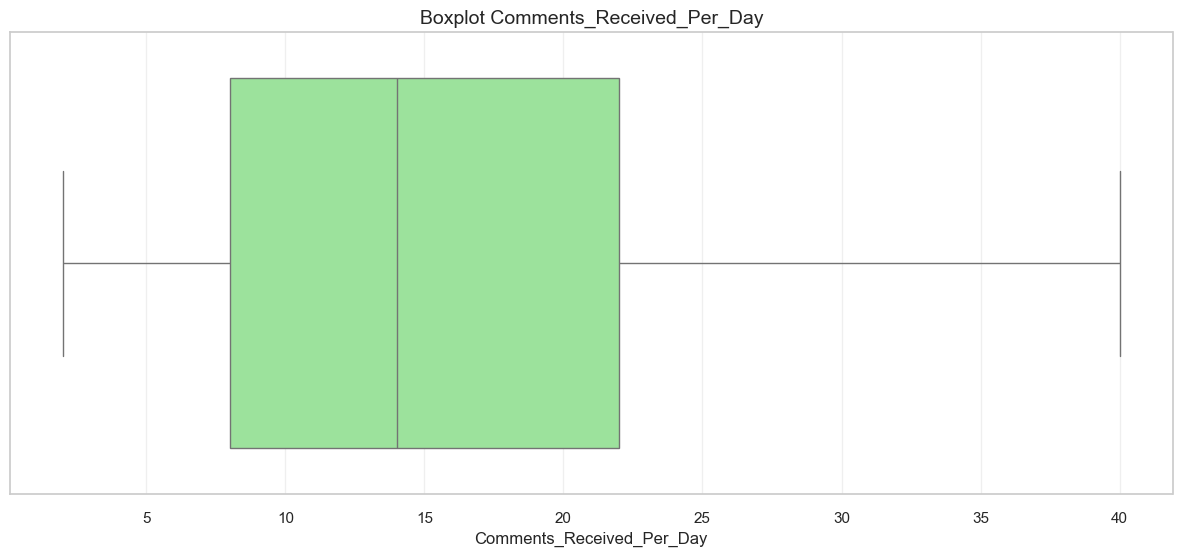

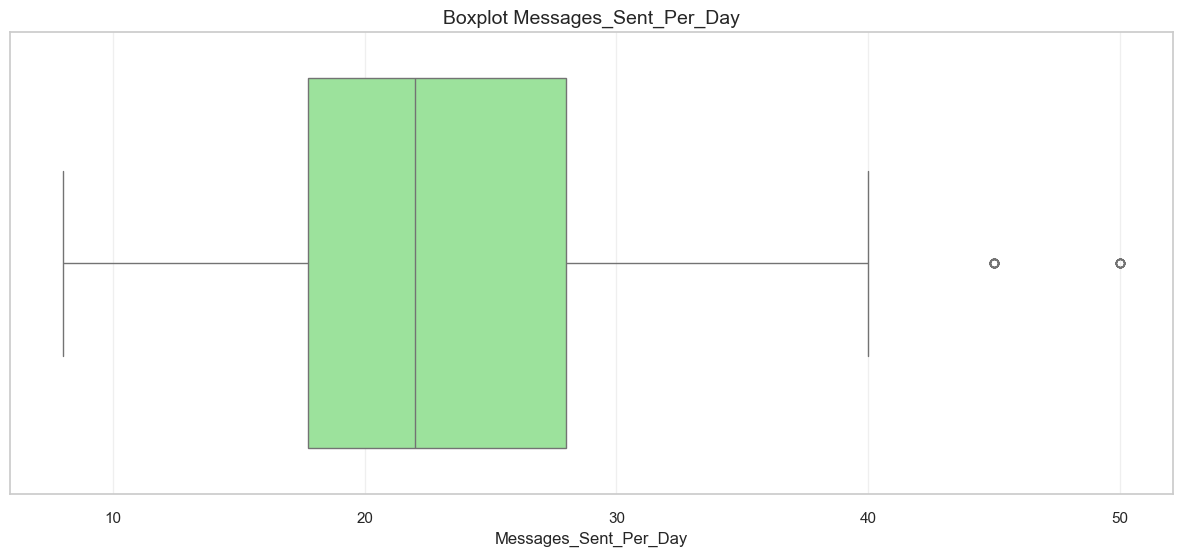

In [176]:
for col in df.columns[1:]:
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f'Boxplot {col}', fontsize=14)
    plt.xlabel(col)
    plt.grid(axis='x', alpha=0.3)
    plt.show()

In [177]:
# cek  missing values
df.isnull().sum()

User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
dtype: int64

In [178]:
# Ganti missing values pada kolom numerik dengan mean
numeric_columns = ['Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day',
                   'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [179]:
# Ganti missing values pada kolom kategorikal dengan mode
categorical_columns = ['Gender', 'Platform']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [180]:
df.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
dtype: int64

# EDA

## Age

In [181]:
df['Age'].isnull().sum()

np.int64(0)

In [182]:
df['Age'].unique()

array(['25', '30', '22', '28', '33', '21', '27', '24', '29', '31', '23',
       '26', '34', '35', '32', 'Male', 'Female', 'Non-binary',
       ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:'],
      dtype=object)

In [183]:
df['Age'].value_counts()

Age
28                                                      92
27                                                      92
29                                                      90
22                                                      74
26                                                      66
24                                                      64
25                                                      64
31                                                      62
21                                                      56
33                                                      56
30                                                      48
23                                                      48
35                                                      38
32                                                      38
34                                                      36
Male                                                    28
Female                                              

In [184]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [185]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [186]:
df['Age'].unique()

array([25. , 30. , 22. , 28. , 33. , 21. , 27. , 24. , 29. , 31. , 23. ,
       26. , 34. , 35. , 32. , 27.5])

In [187]:
plt = px.histogram(df, x='Age', title='Age Distribution')
plt.show()

## Gender

In [188]:
df['Gender'].isnull().sum()

np.int64(0)

In [189]:
df['Gender'].unique()

array(['Female', 'Male', 'Non-binary', '27', '24', '29', '33', '31', '22',
       '25', '28', '30', '23', '34', '26', '35', '21', '32'], dtype=object)

In [190]:
df['Gender'].value_counts()

Gender
Female        345
Male          332
Non-binary    248
29             10
27              8
31              8
28              8
24              6
25              6
22              6
33              4
34              4
21              4
26              4
23              2
30              2
35              2
32              2
Name: count, dtype: int64

In [191]:
valid_genders = ['Female', 'Male', 'Non-binary']
df['Gender'] = df['Gender'].apply(lambda x: x if x in valid_genders else 'Unknown')

In [192]:
df['Gender'].unique()

array(['Female', 'Male', 'Non-binary', 'Unknown'], dtype=object)

In [193]:
plt = px.histogram(df, x='Gender', title='Gender Distribution')
plt.show()

## Platform

In [194]:
df['Platform'].isnull().sum()

np.int64(0)

In [195]:
df['Platform'].unique()

array(['Instagram', 'Twitter', 'Facebook', 'LinkedIn', 'Whatsapp',
       'Telegram', 'Snapchat'], dtype=object)

In [196]:
df['Platform'].value_counts()

Platform
Instagram    251
Twitter      200
Facebook     190
LinkedIn     120
Whatsapp      80
Telegram      80
Snapchat      80
Name: count, dtype: int64

In [197]:
plt = px.histogram(df, x='Platform', title='Platform Distribution')
plt.show()

## Daily Usage Time (minutes)

In [198]:
df['Daily_Usage_Time (minutes)'].isnull().sum()

np.int64(0)

In [199]:
df['Daily_Usage_Time (minutes)'].unique()

array([120.  ,  90.  ,  60.  , 200.  ,  45.  , 150.  ,  85.  , 110.  ,
        55.  , 170.  ,  75.  ,  95.  ,  65.  , 180.  , 100.  ,  40.  ,
       125.  ,  50.  , 140.  , 105.  , 190.  ,  70.  ,  80.  , 160.  ,
       145.  , 130.  , 115.  , 175.  , 165.  , 155.  ,  95.95])

In [200]:
df['Daily_Usage_Time (minutes)'].value_counts()

Daily_Usage_Time (minutes)
90.00     80
60.00     80
75.00     80
70.00     80
85.00     60
65.00     50
55.00     50
95.00     40
105.00    40
50.00     40
120.00    40
170.00    30
100.00    30
45.00     30
150.00    30
80.00     30
165.00    20
110.00    20
175.00    20
140.00    20
115.00    20
130.00    20
145.00    20
180.00    10
200.00    10
125.00    10
40.00     10
190.00    10
160.00    10
155.00    10
95.95      1
Name: count, dtype: int64

In [201]:
plt = px.histogram(df, x='Daily_Usage_Time (minutes)', title='Daily Usage Time (minutes) Distribution')
plt.show()

## Posts Per Day

In [202]:
df['Posts_Per_Day'].isnull().sum()

np.int64(0)

In [203]:
df['Posts_Per_Day'].unique()

array([3.   , 5.   , 2.   , 8.   , 1.   , 4.   , 6.   , 7.   , 3.321])

In [204]:
df['Posts_Per_Day'].value_counts()

Posts_Per_Day
2.000    230
1.000    190
3.000    171
4.000    161
6.000    109
5.000     71
7.000     39
8.000     29
3.321      1
Name: count, dtype: int64

In [205]:
plt = px.histogram(df, x='Posts_Per_Day', title='Posts Per Day Distribution')
plt.show()

## Likes Received Per Day

In [206]:
df['Likes_Received_Per_Day'].isnull().sum()

np.int64(0)

In [207]:
df['Likes_Received_Per_Day'].unique()

array([ 45.   ,  20.   ,  15.   , 100.   ,   5.   ,  60.   ,  30.   ,
        25.   ,  10.   ,  80.   ,  35.   ,  12.   ,  90.   ,  40.   ,
        55.   ,  33.   ,   8.   ,  70.   ,  28.   ,  11.   ,  95.   ,
        18.   ,   9.   ,  85.   ,  38.   ,   6.   ,  13.   ,  75.   ,
        27.   ,  88.   ,  22.   ,  78.   ,  29.   ,  50.   ,  36.   ,
        72.   ,  65.   , 110.   ,  14.   ,  17.   , 105.   ,  43.   ,
        37.   ,  42.   ,  48.   ,  21.   ,  24.   ,  23.   ,  83.   ,
        39.898])

In [208]:
df['Likes_Received_Per_Day'].value_counts()

Likes_Received_Per_Day
30.000     66
12.000     50
20.000     45
22.000     38
50.000     38
65.000     37
37.000     36
18.000     33
15.000     32
40.000     32
10.000     31
35.000     31
45.000     31
27.000     28
17.000     27
25.000     22
33.000     21
60.000     21
55.000     21
80.000     20
85.000     20
75.000     20
90.000     20
95.000     19
13.000     19
100.000    19
14.000     18
42.000     18
48.000     18
23.000     18
21.000     18
8.000      13
70.000     12
78.000     11
38.000     11
9.000      10
72.000     10
11.000     10
83.000      9
43.000      9
110.000     9
105.000     9
24.000      9
28.000      4
5.000       2
6.000       2
29.000      1
88.000      1
36.000      1
39.898      1
Name: count, dtype: int64

In [209]:
plt = px.histogram(df, x='Likes_Received_Per_Day', title='Likes Received Per Day Distribution')
plt.show()

## Comments Received Per Day


In [210]:
df['Comments_Received_Per_Day'].isnull().sum()

np.int64(0)

In [211]:
df['Comments_Received_Per_Day'].unique()

array([10.   , 25.   ,  5.   , 30.   ,  2.   , 15.   , 12.   ,  3.   ,
       20.   ,  7.   ,  4.   , 23.   , 18.   , 22.   , 14.   , 26.   ,
        8.   , 19.   , 17.   , 11.   ,  6.   ,  9.   , 13.   , 40.   ,
       16.   , 35.   , 38.   , 28.   , 36.   , 33.   , 15.611])

In [212]:
df['Comments_Received_Per_Day'].value_counts()

Comments_Received_Per_Day
18.000    78
10.000    71
20.000    70
7.000     68
12.000    61
8.000     61
25.000    57
14.000    56
30.000    55
5.000     55
4.000     49
6.000     48
22.000    48
16.000    36
23.000    21
11.000    21
26.000    19
28.000    18
13.000    13
19.000    12
9.000     10
17.000    10
35.000     9
38.000     9
36.000     9
33.000     9
40.000     9
15.000     8
2.000      6
3.000      4
15.611     1
Name: count, dtype: int64

In [213]:
plt = px.histogram(df, x='Comments_Received_Per_Day', title='Comments Received Per Day Distribution')
plt.show()

## Messages Sent Per Day


In [214]:
df['Messages_Sent_Per_Day'].isnull().sum()

np.int64(0)

In [215]:
df['Messages_Sent_Per_Day'].unique()

array([12.  , 30.  , 20.  , 50.  , 10.  , 25.  , 18.  , 22.  ,  8.  ,
       35.  , 15.  , 40.  , 28.  , 33.  , 17.  , 45.  , 21.  , 11.  ,
       32.  , 24.  , 14.  ,  9.  , 38.  , 31.  , 27.  , 19.  , 26.  ,
       29.  , 23.  , 22.56])

In [216]:
df['Messages_Sent_Per_Day'].value_counts()

Messages_Sent_Per_Day
20.00    112
18.00    102
25.00     89
22.00     80
30.00     79
12.00     78
10.00     61
28.00     58
15.00     48
35.00     31
14.00     30
38.00     29
24.00     28
33.00     21
26.00     20
11.00     20
45.00     19
40.00     11
27.00     11
17.00     11
21.00     11
50.00     10
19.00     10
31.00     10
23.00      9
29.00      9
8.00       1
32.00      1
9.00       1
22.56      1
Name: count, dtype: int64

In [217]:
plt = px.histogram(df, x='Messages_Sent_Per_Day', title='Messages Sent Per Day Distribution')
plt.show()

## Grafik

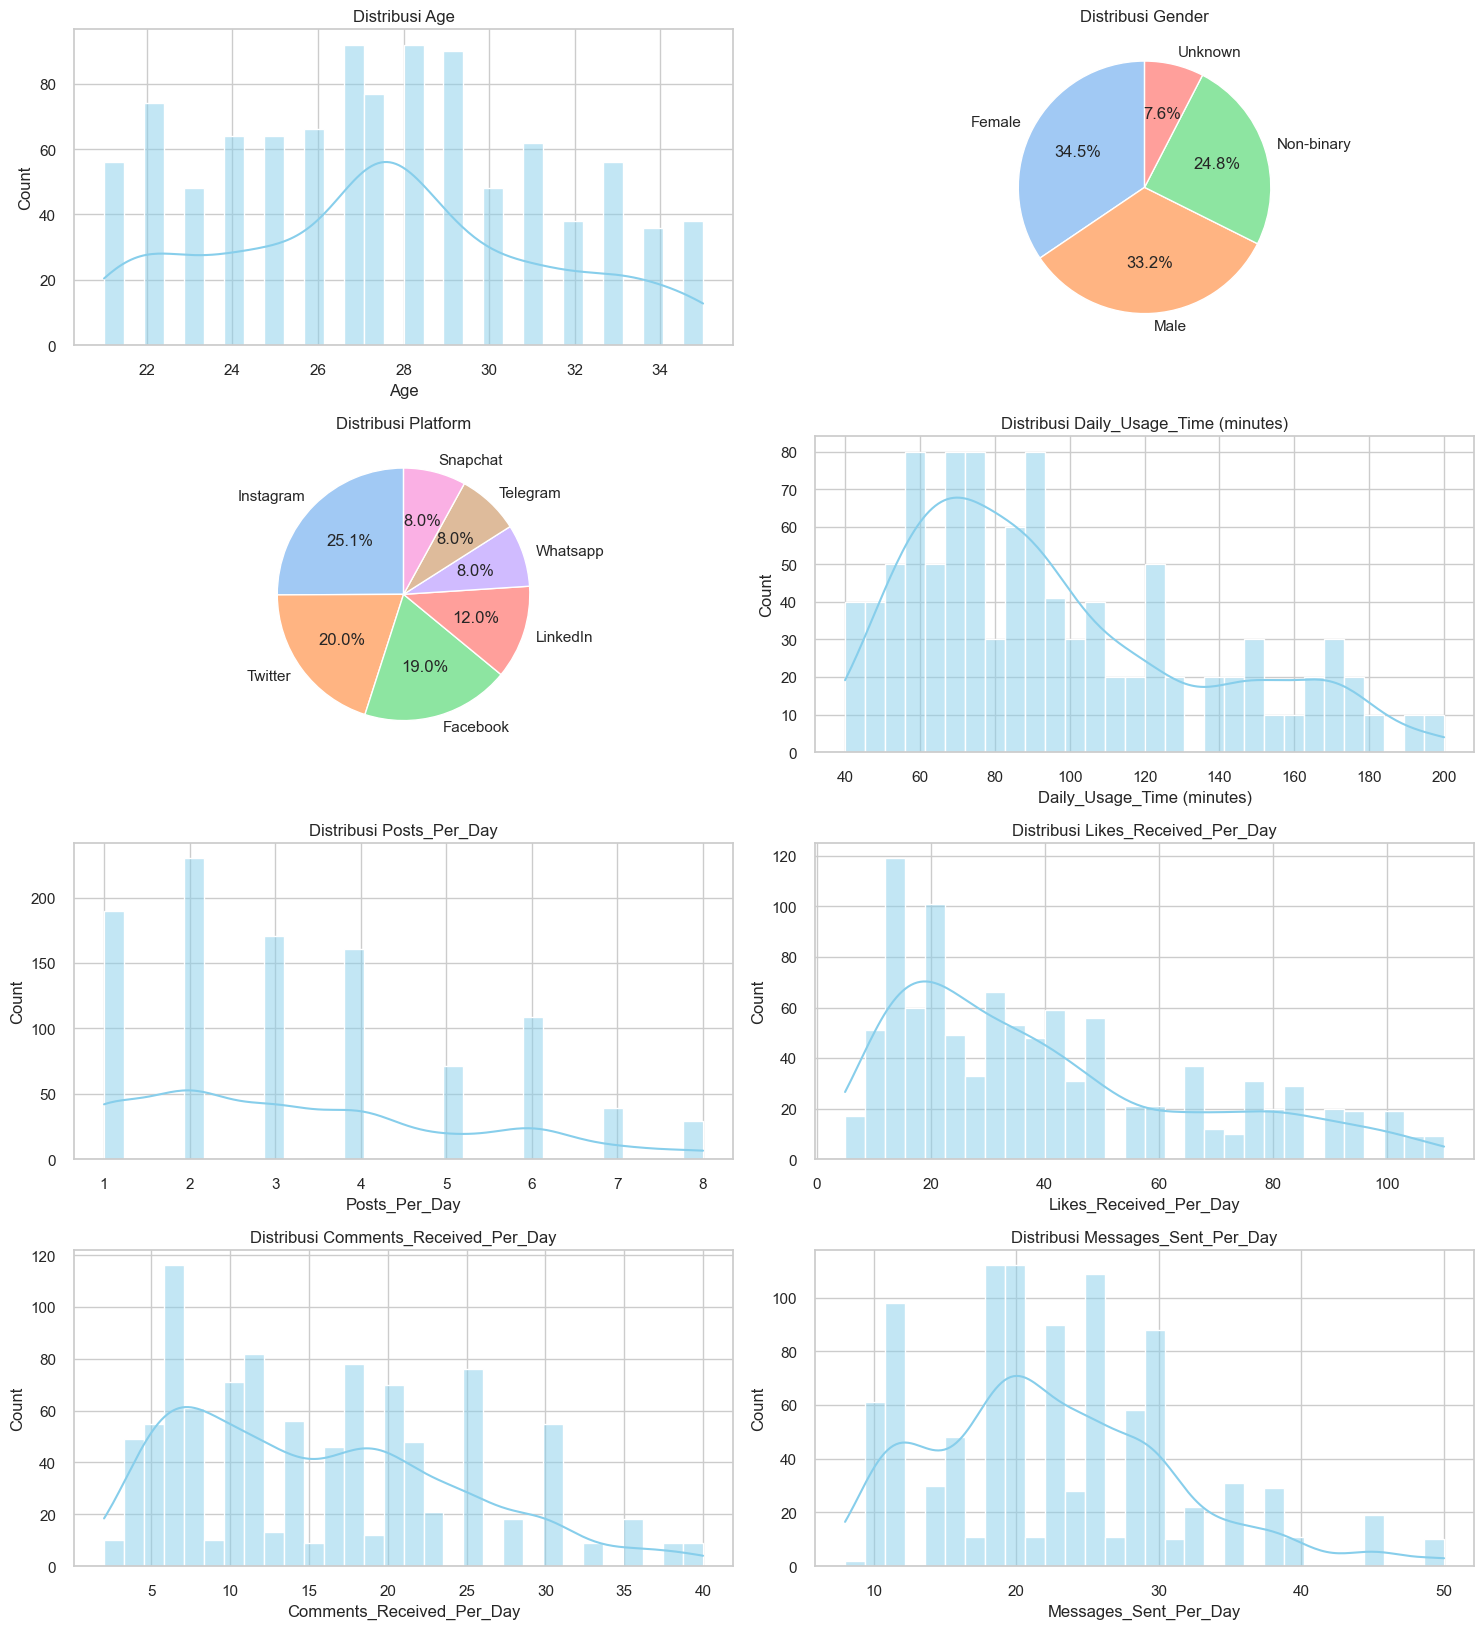

In [221]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 20))

# List of columns (excluding User_ID)
columns = df.columns[1:]

for i, col in enumerate(columns, 1):
    plt.subplot(5, 2, i)  # 4 rows, 2 columns
    
    if col in ['Gender', 'Platform', 'Dominant_Emotion']:
        # Pie chart for categorical columns
        counts = df[col].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', 
                startangle=90, colors=sns.color_palette("pastel"))
        plt.title(f'Distribusi {col}')
    elif df[col].dtype in ['int64', 'float64']:
        # Histogram with KDE for numeric columns
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        plt.title(f'Distribusi {col}')
    
    plt.tight_layout()

plt.show()

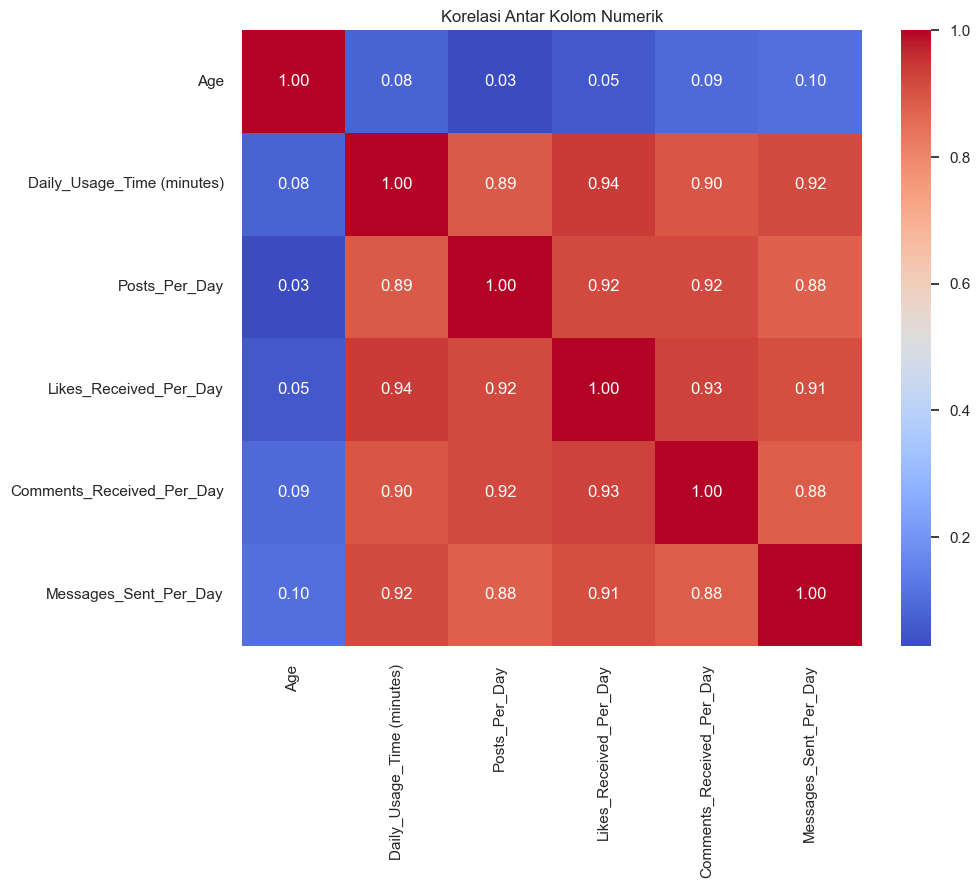

In [222]:
corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Kolom Numerik")
plt.show()

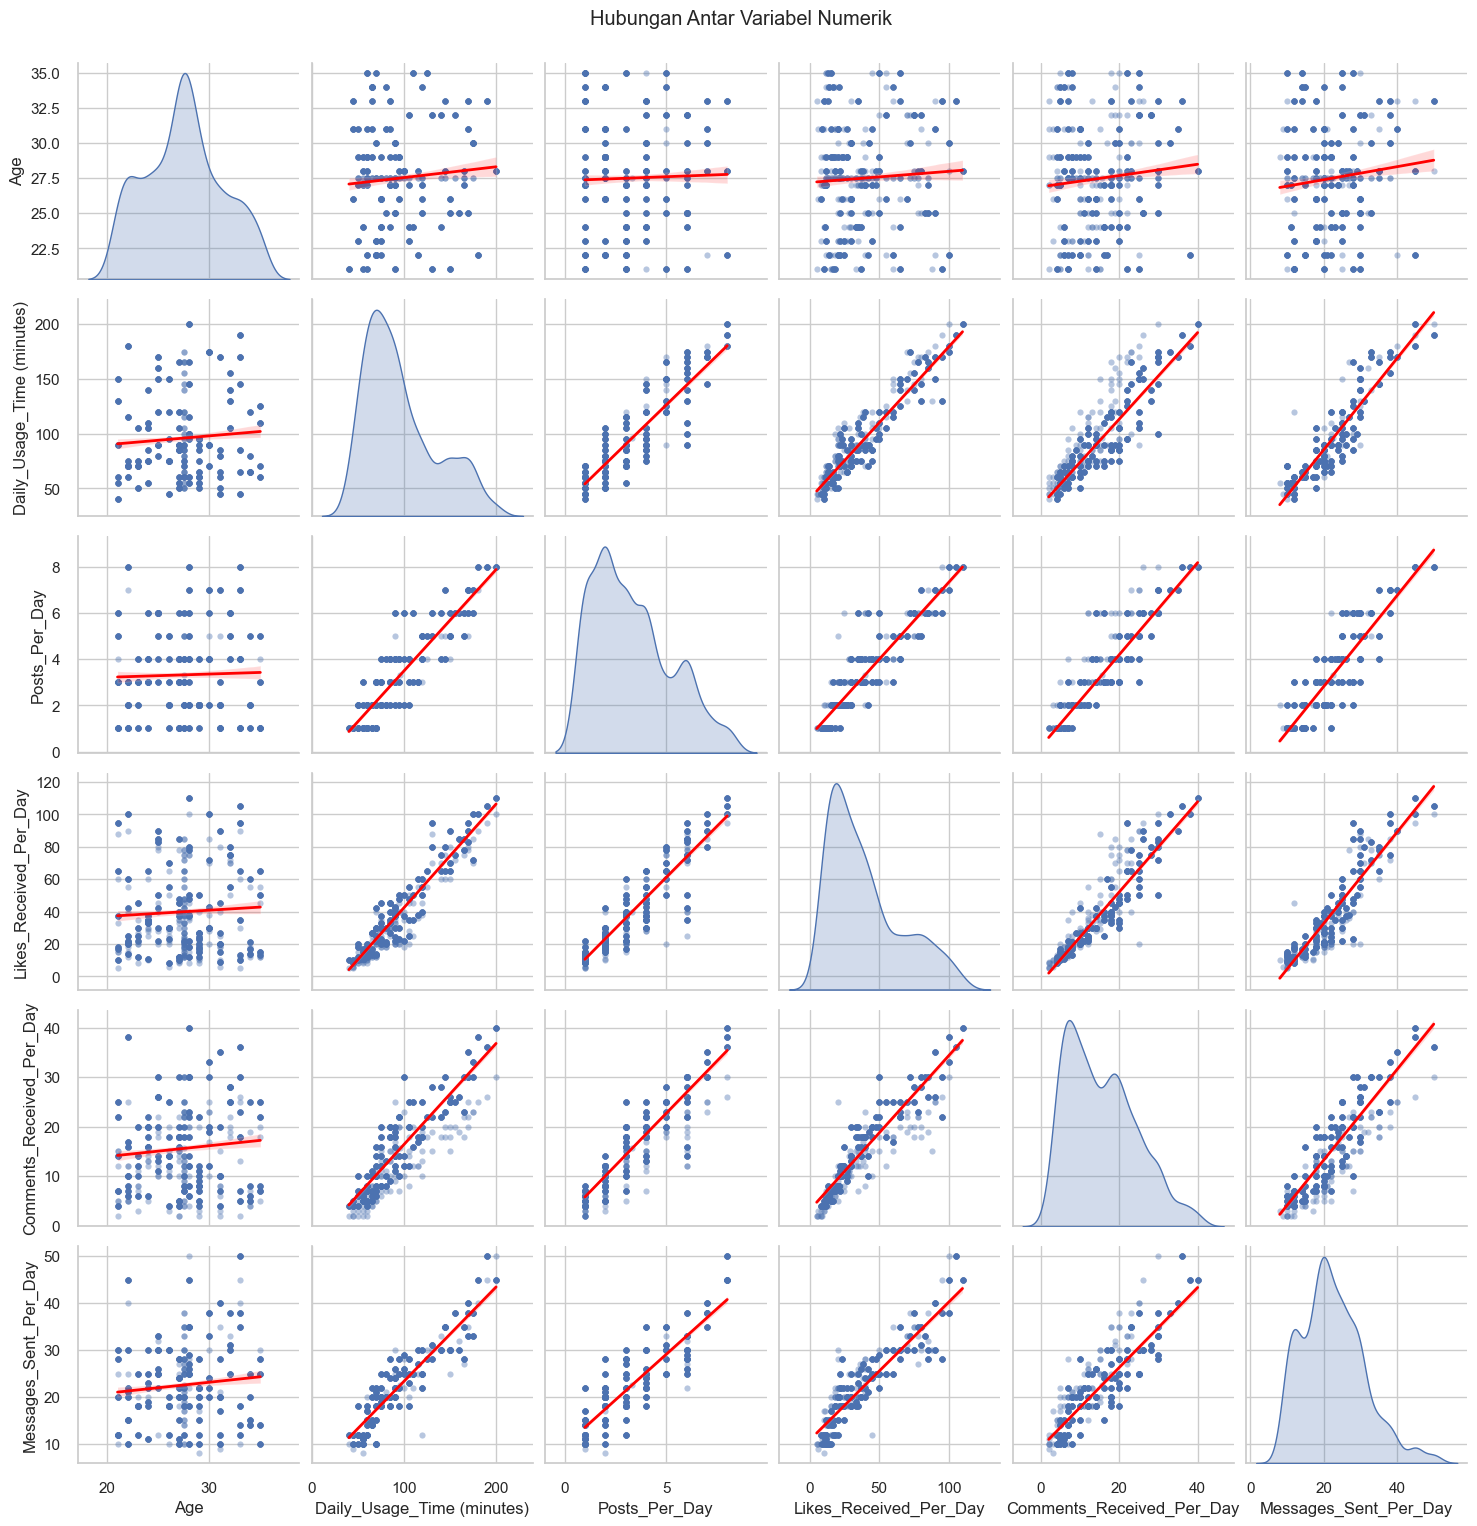

In [223]:
sns.pairplot(df.select_dtypes(include=['int64', 'float64']), 
             kind='reg',
             diag_kind='kde',
             plot_kws={
                 'line_kws': {'color': 'red', 'linewidth': 2},
                 'scatter_kws': {'alpha': 0.4, 's': 20}
             })
plt.suptitle('Hubungan Antar Variabel Numerik', y=1.02)
plt.show()

Encode

In [227]:
encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])
df['Platform'] = encoder.fit_transform(df['Platform'])

In [233]:
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
0,1,25.0,0,1,120.0,3.0,45.0,10.0,12.0
1,2,30.0,1,5,90.0,5.0,20.0,25.0,30.0
2,3,22.0,2,0,60.0,2.0,15.0,5.0,20.0
3,4,28.0,0,1,200.0,8.0,100.0,30.0,50.0
4,5,33.0,1,2,45.0,1.0,5.0,2.0,10.0


In [234]:
df.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
dtype: int64

In [235]:
df.duplicated().sum()

np.int64(0)

# Scaling

In [327]:
cols_to_scale = [
    'Daily_Usage_Time (minutes)', 
    'Posts_Per_Day',              
    'Likes_Received_Per_Day',      
    'Comments_Received_Per_Day',   
    'Messages_Sent_Per_Day',       
    'Age'                         
]

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[cols_to_scale])
df_scaled = pd.DataFrame(df_scaled, columns=cols_to_scale)

In [293]:
df_scaled.head()

,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Age
0,0.619660,-0.167828,0.193496,-0.636841,-1.241219,-0.660538
1,-0.153305,0.877831,-0.754642,1.065639,0.874496,0.660538
2,-0.926269,-0.690658,-0.944269,-1.204334,-0.300902,-1.453183
3,2.680899,2.446320,2.279398,1.633132,3.225290,0.132108
4,-1.312751,-1.213488,-1.323524,-1.544830,-1.476299,1.453183


In [294]:
df_scaled.isnull().sum()

Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Age                           0
dtype: int64

In [253]:
df.duplicated().sum()

np.int64(0)

# Clustering

## K-Means

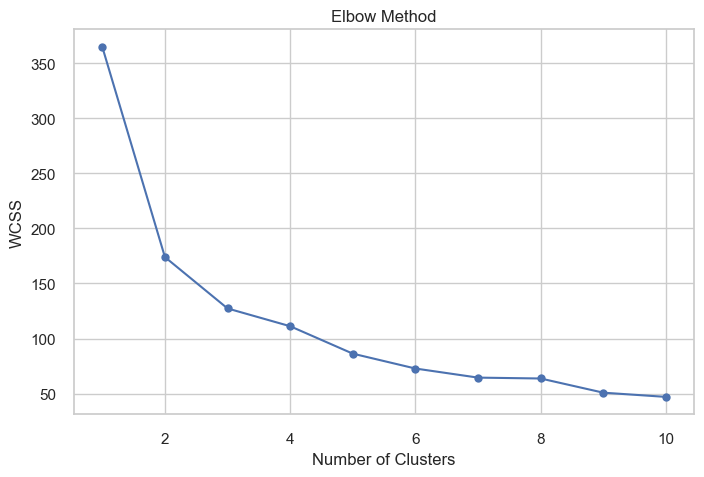

In [328]:
# Hitung WCSS untuk berbagai nilai k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

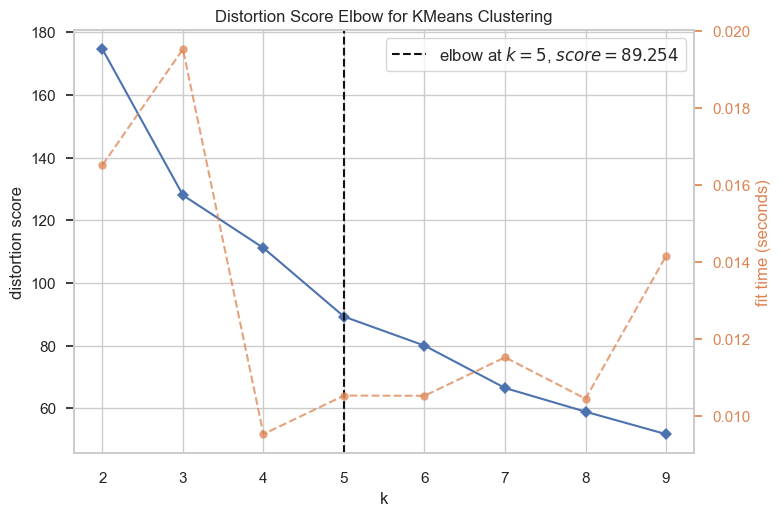

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [329]:
model  =  KMeans()
visualizer  = KElbowVisualizer( model, k=(2,10))
visualizer.fit(df_scaled)
visualizer.show()

Untuk k=2, silhouette score: 0.4786
Untuk k=3, silhouette score: 0.3432
Untuk k=4, silhouette score: 0.3104
Untuk k=5, silhouette score: 0.3464
Untuk k=6, silhouette score: 0.3397
Untuk k=7, silhouette score: 0.3420
Untuk k=8, silhouette score: 0.3251
Untuk k=9, silhouette score: 0.3535


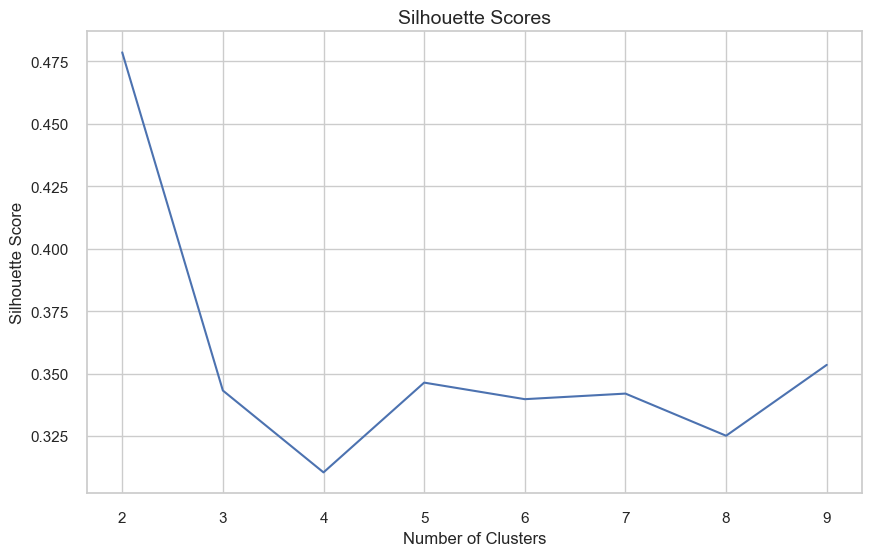

In [330]:
scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    preds = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, preds)
    scores.append(score)
    print(f"Untuk k={k}, silhouette score: {score:.4f}")

# Visualizing Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), scores)
plt.title('Silhouette Scores', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(range(2, 10))
plt.show()

In [331]:
optimal_k = 5

# Fianl Clustering & Analysisis
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(df_scaled)

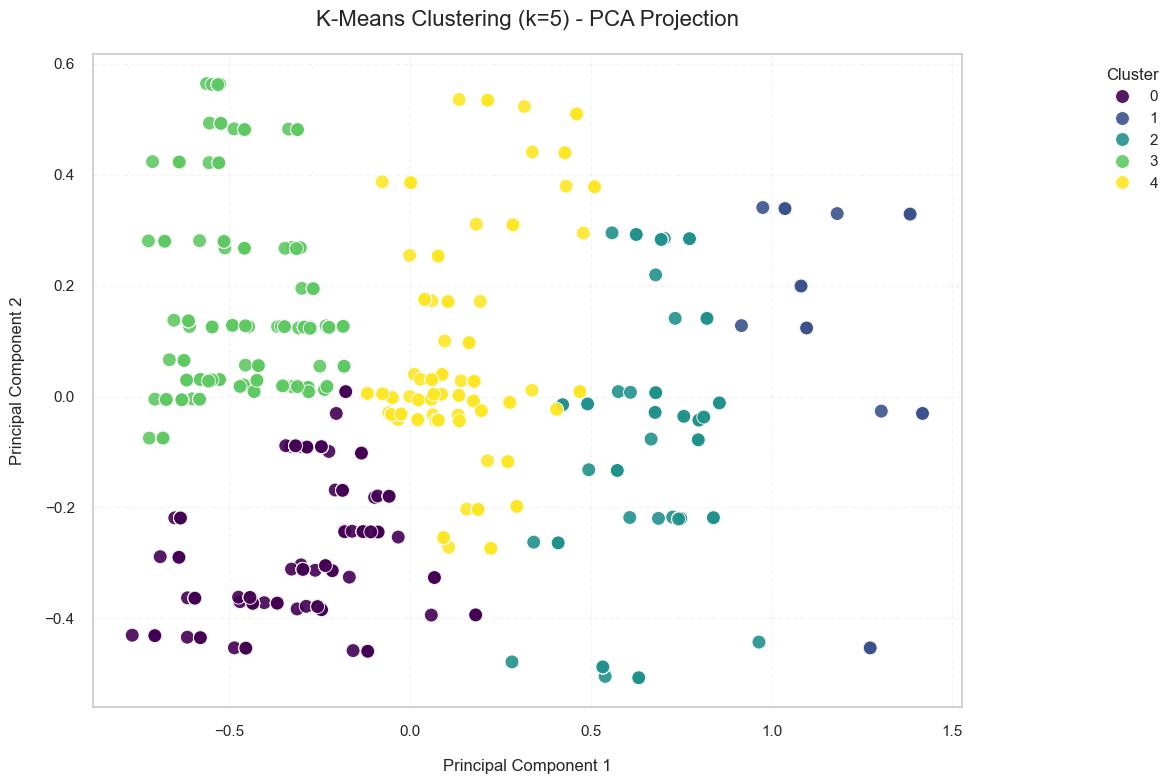

In [332]:
plt.figure(figsize=(12, 8))

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = cluster_labels

# Visualisasi 2D PCA
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', 
                palette='viridis', s=100, alpha=0.9, 
                edgecolor='w', linewidth=0.7)
plt.title(f'K-Means Clustering (k={optimal_k}) - PCA Projection', 
          fontsize=16, pad=20)
plt.xlabel('Principal Component 1', fontsize=12, labelpad=14)
plt.ylabel('Principal Component 2', fontsize=12, labelpad=14)
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend(title='Cluster', bbox_to_anchor=(1.15, 1), loc='upper left')
plt.tight_layout()
plt.show()

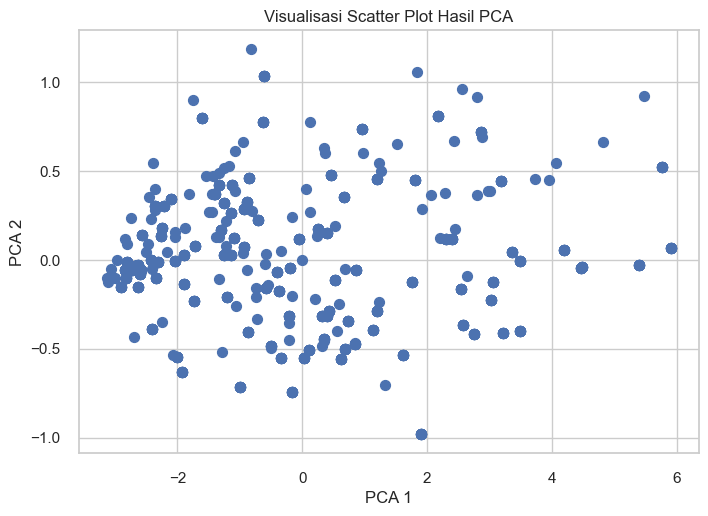

wcss score for n_cluster = 2 is [1554.6784964781264]
silhoutte score for n_clusters = 2 is 0.5866237813647306
wcss score for n_cluster = 3 is [1554.6784964781264, 761.4724925255184]
silhoutte score for n_clusters = 3 is 0.539138873300107
wcss score for n_cluster = 4 is [1554.6784964781264, 761.4724925255184, 532.7401566156941]
silhoutte score for n_clusters = 4 is 0.5053351315868685
wcss score for n_cluster = 5 is [1554.6784964781264, 761.4724925255184, 532.7401566156941, 331.2289082068592]
silhoutte score for n_clusters = 5 is 0.5230887115261471
wcss score for n_cluster = 6 is [1554.6784964781264, 761.4724925255184, 532.7401566156941, 331.2289082068592, 271.31267002412045]
silhoutte score for n_clusters = 6 is 0.5002302303325387
wcss score for n_cluster = 7 is [1554.6784964781264, 761.4724925255184, 532.7401566156941, 331.2289082068592, 271.31267002412045, 229.67637949342634]
silhoutte score for n_clusters = 7 is 0.4856368281991445
wcss score for n_cluster = 8 is [1554.6784964781264, 

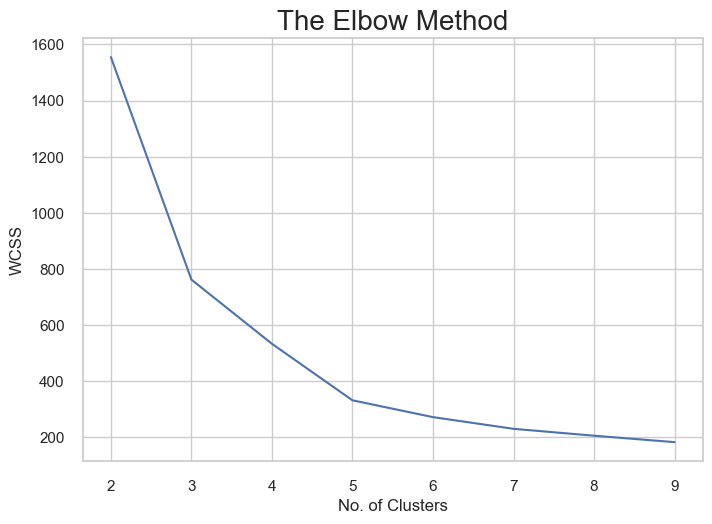

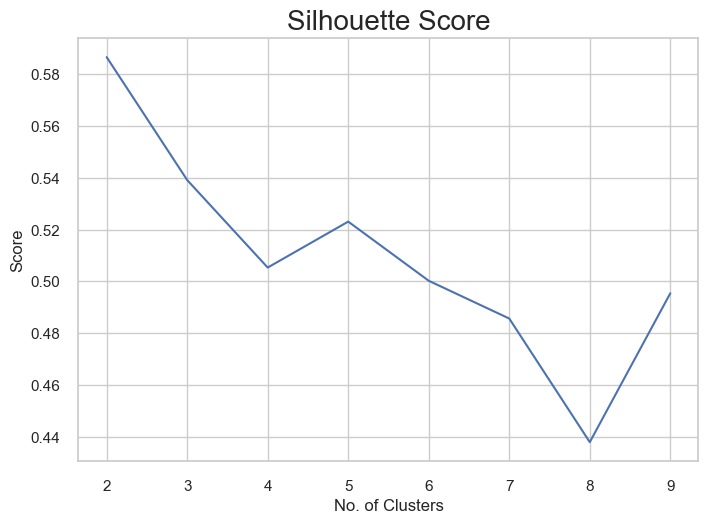

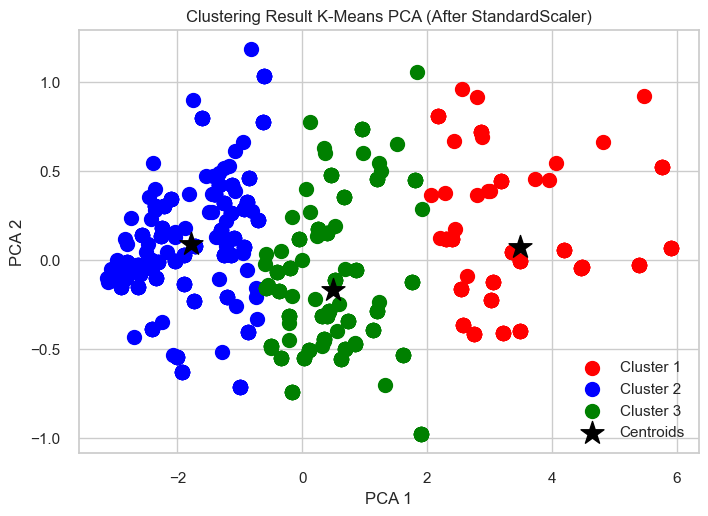

In [356]:
kolom_pca = [
    'Daily_Usage_Time (minutes)',
    'Posts_Per_Day',
    'Likes_Received_Per_Day',
    'Comments_Received_Per_Day',
    'Messages_Sent_Per_Day'
]

# Memilih hanya kolom-kolom yang diperlukan
df_pca = df[kolom_pca]

# Menangani nilai yang hilang dengan mengisi menggunakan median
df_pca = df_pca.fillna(df_pca.median())

# Standarisasi data
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

# Penerapan PCA dengan 2 komponen utama
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_pca_scaled)

# Membuat DataFrame hasil PCA
pca_df = pd.DataFrame(pca_data, columns=['pc1', 'pc2'])

pca_data = pd.DataFrame(pca_data, columns=["pc1", "pc2"])
plt.scatter(pca_data["pc1"], pca_data["pc2"], s = 50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Scatter Plot Hasil PCA')
plt.show()

pca_data = pca_data.values

wcss = []
scores = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(pca_data)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(pca_data, labels)
    scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

# Visualizing Elbow Method
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

# Visualizing Silhouette Score
plt.plot(range(2, 10), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

# Model Build
# Based on the consideration of Elbow Method and Silhouette Score
# I will use many clusters of 3
kmeansmodel = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans= kmeansmodel.fit_predict(pca_data)

# Cluster visualization using scatter plot
plt.scatter(pca_data[y_kmeans == 0, 0], pca_data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_data[y_kmeans == 1, 0], pca_data[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_data[y_kmeans == 2, 0], pca_data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Display the cluster center
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids', marker = '*')
plt.title('Clustering Result K-Means PCA (After StandardScaler)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

## DBSCAN

In [342]:
epsilon = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4]
min_samples = [10, 15, 20, 25]

sil_avg = []
max_value = (0, 0, 0, -1)  # Initialize max_value with a negative silhouette score

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples=min_samples[j], eps=epsilon[i]).fit(df_pca)

        # Check if there are at least two clusters
        unique_labels = set(db.labels_)
        if len(unique_labels) >= 2:
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_

            # Number of clusters in labels, ignoring noise if present.
            n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)

            silhouette_avg = silhouette_score(df_pca, labels)
            sil_avg.append(silhouette_avg)

            if silhouette_avg > max_value[3]:
                max_value = (epsilon[i], min_samples[j], n_clusters_, silhouette_avg)

print("epsilon =", max_value[0],
      "\nmin_samples =", max_value[1],
      "\nnumber of clusters =", max_value[2],
      "\naverage silhouette score = %.4f" % max_value[3])

epsilon = 1 
min_samples = 10 
number of clusters = 5 
average silhouette score = 0.7608


In [343]:
db=DBSCAN(eps=2.5, min_samples=15, metric='euclidean')
db.fit(df_pca)

DBSCAN(eps=2.5, min_samples=15)

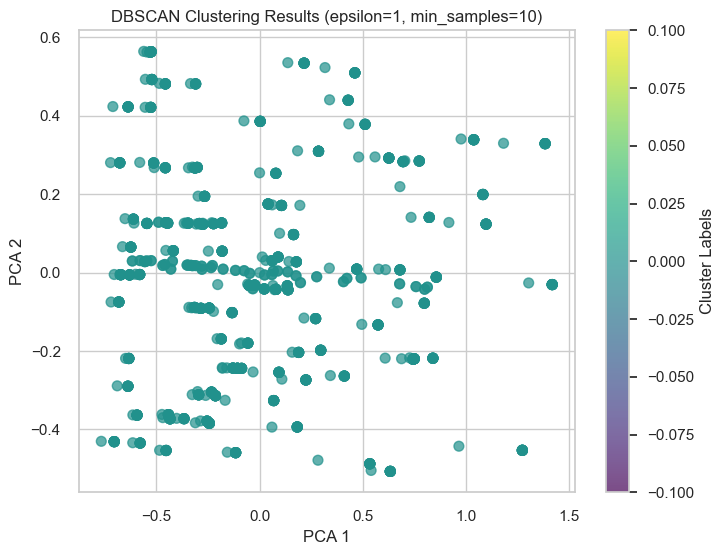

In [344]:
best_epsilon = max_value[0]
best_min_samples = max_value[1]
best_labels = db.labels_

plt.figure(figsize=(8, 6))
plt.scatter(df_pca.to_numpy()[:, 0], df_pca.to_numpy()[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.7)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clustering Results (epsilon={}, min_samples={})'.format(best_epsilon, best_min_samples))
plt.colorbar(label='Cluster Labels')
plt.show()